#### ALUNO: Tarso Bertolini Rodrigues
Ja peço perdao por qualquer erro de caligrafia nas anotacoes ou nas obs do codigo, visto que meu teclado esta com input duplo <3
###REQUISITOS:

**Implemente três funções para a Codificação de Huffman para a compressão e descompressão de textos**:

Encoder, que recebe uma string de qualquer tamanho como entrada e gera o Código de Huffman e o dicionário com o código binário para cada caractere como saída;

Decoder, que recebe um Código de Huffman e o dicionário com o código binário como entrada e gera a string correspondente como saída;

Uma função que calcula qual foi a taxa de compressão e o ganho de espaço ao utilizar a Codificação de Huffman para a compressão do texto de entrada.

### EXTRAS:

Adicionei a possibilidade do código salvar o resultado anterior e plottar um grafico com os resultados, facilitando a comparatividade numérica, e tambem que fica bem mais legal :)

## Encoder (Codificador)

A função encoder recebe uma string e retorna o texto codificado em binário segundo o algoritmo de Huffman, juntamente com o dicionário de códigos gerado.


**Contagem de Frequência:**

Utilizei a classe Counter para contar a frequência de cada caractere na string. (facilitou muito meu trabalho kkk)

**Construção da Árvore de Huffman:**

Criei uma árvore binária onde os nós folha representam os caracteres e suas frequências, e os nós internos representam a soma das frequências dos filhos.

**Geração dos Códigos Binários:**

O código a árvore para atribuir um código binário único a cada caractere, garantindo que os códigos sejam prefixos livres.

## Decoder (Decodificador)
A função decoder recebe o texto codificado e o dicionário de códigos, retornando o texto original decodificado.



Inversão do Dicionário: o programa um dicionário invertido onde os códigos binários são as chaves e os caracteres são os valores.

Decodificação Bit a Bit: Percorremos a string codificada acumulando bits até encontrar um código válido no dicionário invertido, então adicionamos o caractere correspondente ao resultado.

Digite o texto a ser comprimido: alex

--- Resultados da Execução Atual ---
Texto original: alex
Texto codificado: 00100111
Dicionário de códigos: {'a': '00', 'e': '01', 'l': '10', 'x': '11'}
Texto decodificado: alex
Estatísticas de compressão: {'compression_rate': 0.25, 'space_saving': 0.75}


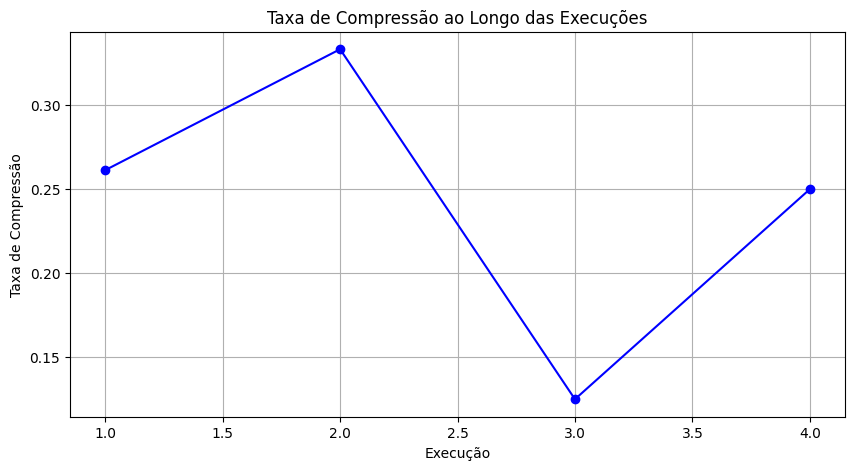

In [8]:
import heapq
from collections import Counter
import json
import os
import matplotlib.pyplot as plt

# --- Classes para a Árvore de Huffman ---
class Node:
    def __init__(self, freq):
        self.freq = freq

    def __lt__(self, other):
        return self.freq < other.freq

class LeafNode(Node):
    def __init__(self, freq, char):
        super().__init__(freq)
        self.char = char

class InternalNode(Node):
    def __init__(self, left, right):
        super().__init__(left.freq + right.freq)
        self.left = left
        self.right = right

# --- Função Encoder (Compressão) ---
def build_huffman_tree(text):
    frequency = Counter(text)
    if not frequency:
        return None

    heap = []
    for char, count in frequency.items():
        heapq.heappush(heap, LeafNode(count, char))

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        heapq.heappush(heap, InternalNode(left, right))

    return heapq.heappop(heap) if heap else None

def build_encoding_dict(root):
    codes = {}
    if root is None:
        return codes

    def traverse(node, current_code):
        if isinstance(node, LeafNode):
            code = current_code if current_code else '0'
            codes[node.char] = code
        else:
            traverse(node.left, current_code + '0')
            traverse(node.right, current_code + '1')

    traverse(root, '')
    return codes

def encoder(text):
    if not text:
        return '', {}

    root = build_huffman_tree(text)
    codes = build_encoding_dict(root)

    encoded_str = ''.join([codes[char] for char in text])
    return encoded_str, codes

# --- Função Decoder (Descompressão) ---
def decoder(encoded_str, code_dict):
    if not encoded_str:
        return ''

    reversed_dict = {v: k for k, v in code_dict.items()}
    current_code = ''
    decoded_chars = []

    for bit in encoded_str:
        current_code += bit
        if current_code in reversed_dict:
            decoded_chars.append(reversed_dict[current_code])
            current_code = ''

    return ''.join(decoded_chars)

# --- Função de Estatísticas de Compressão ---
def compression_stats(original_text, encoded_str):
    if not original_text:
        return {'compression_rate': 0.0, 'space_saving': 0.0}

    original_size = len(original_text) * 8  # 8 bits por caractere (ASCII)
    compressed_size = len(encoded_str)

    compression_rate = compressed_size / original_size
    space_saving = 1 - compression_rate

    return {
        'compression_rate': compression_rate,
        'space_saving': space_saving
    }

# --- Função para Salvar e Carregar Histórico ---
def save_stats(stats):
    filename = "huffman_stats.json"
    history = []

    # Se o arquivo existe e não está vazio, carrega o histórico
    if os.path.exists(filename) and os.path.getsize(filename) > 0:
        try:
            with open(filename, 'r') as f:
                history = json.load(f)
        except json.JSONDecodeError:
            history = []  # Se o arquivo estiver corrompido, começa do zero

    # Adiciona novo resultado
    history.append(stats)

    # Salva o histórico atualizado
    with open(filename, 'w') as f:
        json.dump(history, f, indent=4)

def load_stats():
    filename = "huffman_stats.json"
    if os.path.exists(filename) and os.path.getsize(filename) > 0:
        try:
            with open(filename, 'r') as f:
                return json.load(f)
        except json.JSONDecodeError:
            return []  # Retorna lista vazia se o arquivo estiver corrompido
    return []  # Retorna lista vazia se o arquivo não existir ou estiver vazio

# --- Função para Gerar Gráfico ---
def plot_compression_history():
    history = load_stats()
    if not history:
        print("Nenhum dado histórico encontrado. Execute o programa para gerar dados.")
        return

    # Extrai taxas de compressão
    compression_rates = [entry['compression_rate'] for entry in history]
    executions = range(1, len(history) + 1)

    # Configura o gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(executions, compression_rates, marker='o', linestyle='-', color='b')
    plt.title("Taxa de Compressão ao Longo das Execuções")
    plt.xlabel("Execução")
    plt.ylabel("Taxa de Compressão")
    plt.grid(True)
    plt.savefig("compression_history.png")  # Salva o gráfico como imagem
    plt.show()

# --- Exemplo de Uso ---
if __name__ == "__main__":
    texto = input("Digite o texto a ser comprimido: ")
    encoded, codes = encoder(texto)
    decoded = decoder(encoded, codes)
    stats = compression_stats(texto, encoded)

    print("\n--- Resultados da Execução Atual ---")
    print("Texto original:", texto)
    print("Texto codificado:", encoded)
    print("Dicionário de códigos:", codes)
    print("Texto decodificado:", decoded)
    print("Estatísticas de compressão:", stats)

    # Salva estatísticas e gera gráfico
    save_stats(stats)
    plot_compression_history()